### Analysis of CycIF data from PTCL

In [2]:
# Import librarires
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
import re

# Create anndata and scanpy
import anndata as ad
import scanpy as sc
import scanpy.external as sce
import bbknn

# Import custom functions
import wget

#### Import data

In [3]:
# Set working directory
# Laptop
WD = "/Users/aj/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma/20190214_Datadump/"
# HMS
#WD = "C:/Users/ajn16/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma/20190214_Datadump/"

os.chdir(WD)
data = pd.read_csv('PTCLCycle1to9_CytMedian_nonorm.csv', delimiter=',', index_col=0)
meta = pd.read_csv('meta.csv', delimiter=',',index_col=0)

In [290]:
data.head()

DAPI  BACK  CD2   TCR  DAPI02  CD4  CD3D  CD7  DAPI03  CD43   ...    \
cell_id                                                                ...     
1_1       134    62   87  1201     182  105    47   20     211    59   ...     
1_2        15     5   19   140      12   11     9    5      38     2   ...     
1_3        14     6   27   378      22   11     7    3      38    10   ...     
1_4        36    10   22   490      49   11     6    7     126     6   ...     
1_5        57    24   64  1117      68   32    22    8     218    54   ...     

         BACK.1  BCL6  DAPI12  EBVLMP  BACK.2  CD31  DAPI13  CD16  BACK.3  \
cell_id                                                                     
1_1           9    89     190     122       6     4     171    84       4   
1_2           2    19      48      10       1     2      29     9       2   
1_3           1    11      43      16       2     0      35    26       0   
1_4           2    13      95      19       2     0      60    18       0   
1_5           2    23     145      50       2     0      96    51       0   

         PSTAT3  
cell_id          
1_1          13  
1_2           3  
1_3           0  
1_4           2  
1_5           0  

[5 rows x 52 columns]

In [291]:
meta.head()

core  patient StudyID  Tissue       DX  DX_trim  code
cell_id                                                       
1_1         1        1  Tonsil  Tonsil  Control  Control     1
1_2         1        1  Tonsil  Tonsil  Control  Control     1
1_3         1        1  Tonsil  Tonsil  Control  Control     1
1_4         1        1  Tonsil  Tonsil  Control  Control     1
1_5         1        1  Tonsil  Tonsil  Control  Control     1

In [292]:
# custom normalization
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_normalize.py'
exec(open(wget.download(file_url)).read())
data = mi_pp_normalize (data)

Applying log transformation and quantile normalization...


/Users/aj/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


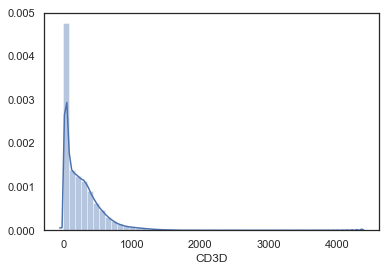

In [9]:
sns.distplot(data["CD3D"])

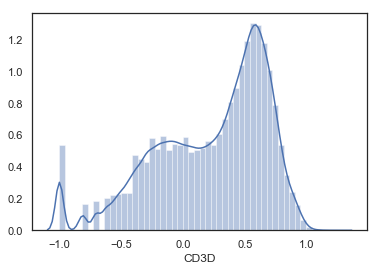

In [10]:
sns.distplot(data2["CD3D"])

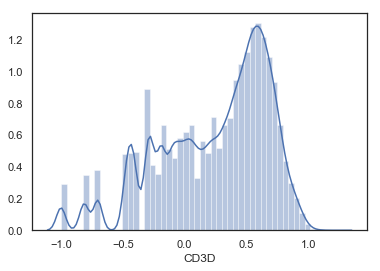

In [30]:
# Subset the cells of intrest and view distibution of log normalised data
y = data5.index
data6 = data2.loc[ y , : ]
data6.shape
sns.distplot(data6["CD3D"])

In [150]:
data8 = data2[(data2.CD3D < -0.5) | (data2.CD3D > 0.5)]
data8.shape

(297818, 52)

In [294]:
# Remove non-bimodal genes
d = data
#goi = ['TCR', 'CD30', 'KER', 'GATA3', 'CD21', 'ERK']
#d = d.drop (goi, axis = 1)

# Manual clipping of non-expressing genes
d.CD2[d.CD2 < -2] = 0
d.CD4[d.CD4 < 0] = 0
d.CD3D[d.CD3D < 0] = 0
d.CD7[d.CD7 < 0] = 0
d.CD43[d.CD43 < -2] = 0
d.ALK[d.ALK < -1] = 0
d.CD45[d.CD45 < -1] = 0
d.KI67[d.KI67 < -1.3] = 0
d.CD5[d.CD5 < -1] = 0
d.FOXP3[d.FOXP3 < -2] = 0
d.CD8[d.CD8 < -1.5] = 0
d.CD68[d.CD68 < -1.8] = 0
d.CD20[d.CD20 < 0.6] = 0
d.CD163[d.CD163 < -2] = 0
d.PDL1[d.PDL1 < -1.8] = 0
d.CD56[d.CD56 < -1] = 0
d.PD1[d.PD1 < -1] = 0
d.CD206[d.CD206 < -0.8] = 0
d.S6P[d.S6P < -1] = 0
d.TBET[d.TBET < 0] = 0

In [295]:
from scipy.stats import zscore
d = d.apply(zscore)

In [157]:
# Read
adata = sc.read("adata_ptcl.h5ad")

In [31]:
# Save
adata.write("adata_ptcl.h5ad")

#### Look at the head of data

#### Remove DAPI and background channels

In [293]:
# Drop DAPI
data = data.drop(list(data.filter(regex='DAPI|BACK', axis=1)), axis=1)
data.head()

CD2       TCR       CD4      CD3D       CD7      CD43       ALK  \
cell_id                                                                         
1_1     -0.011393  0.589162  0.174610  0.043100 -0.374257  0.015502  0.080084   
1_2     -0.348197  0.107484 -0.394797 -0.404718 -0.663823 -0.827373 -0.626629   
1_3     -0.270409  0.330085 -0.394797 -0.472805 -0.770524 -0.426546 -0.764429   
1_4     -0.315744  0.388244 -0.394797 -0.514568 -0.593542 -0.553766 -0.391058   
1_5     -0.079359  0.572912 -0.125286 -0.162560 -0.565650 -0.006552 -0.155487   

             CD45      CD10      KI67    ...         CD21       S6P       ERK  \
cell_id                                  ...                                    
1_1      0.176558  0.372001 -0.169406    ...    -0.176813 -0.164304 -0.116538   
1_2     -0.499802 -0.279067 -1.000000    ...    -0.730479 -0.532046 -0.649936   
1_3      0.041806 -0.249225 -0.268424    ...    -0.408090 -0.752770 -0.779134   
1_4     -0.059220 -0.173718 -0.105335    ...    -0.552336 -0.505540 -0.649936   
1_5      0.323727  0.138919 -0.146131    ...    -0.264285 -0.325846 -0.379952   

             TBET       TDT      BCL6    EBVLMP      CD31      CD16    PSTAT3  
cell_id                                                                        
1_1      0.128775  0.386580  0.293514  0.535619 -0.645705  0.264398 -0.137168  
1_2     -0.627848 -0.165196 -0.151486 -0.263972 -0.822852 -0.372990 -0.630434  
1_3     -0.454808 -0.184628 -0.308986 -0.113734 -1.000000 -0.070255 -1.000000  
1_4     -0.220006 -0.098009 -0.260845 -0.058802 -1.000000 -0.175190 -0.766830  
1_5      0.062140  0.232775 -0.096428  0.250489 -1.000000  0.122004 -1.000000  

[5 rows x 35 columns]

In [296]:
# Convert to AnnData 
adata = sc.AnnData(data)

In [297]:
# Attach meta data with Anndata
adata.obs = meta

In [298]:
# Remove markers after cycle 10
adata = adata[:,0:29]
# Remove other identified bad markers
columns = ['CD10', 'CD11B', 'CD57', 'TCR', 'CD30', 'KER', 'GATA3', 'CD21', 'ERK']
remove = np.in1d(adata.var_names, columns)
adata = adata[:, ~remove]

In [299]:
# Covert patient column into string 
adata.obs['patient'] = adata.obs['patient'].astype(str)
adata.obs['core'] = adata.obs['core'].astype(str)

In [300]:
adata

AnnData object with n_obs × n_vars = 681460 × 20 
    obs: 'core', 'patient', 'StudyID', 'Tissue', 'DX', 'DX_trim', 'code'

... storing 'core' as categorical
... storing 'patient' as categorical
... storing 'StudyID' as categorical
... storing 'Tissue' as categorical
... storing 'DX' as categorical
... storing 'DX_trim' as categorical


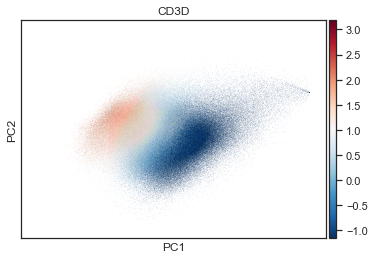

In [301]:
# Calculate PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CD3D', color_map="RdBu_r")

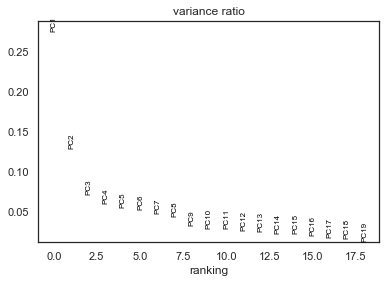

In [302]:
sc.pl.pca_variance_ratio(adata)

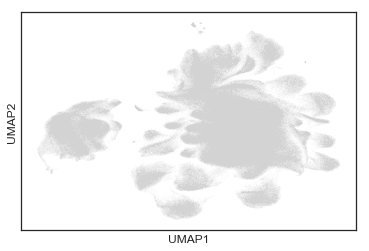

In [303]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=10)
sc.tl.umap(adata)
sc.pl.umap(adata)

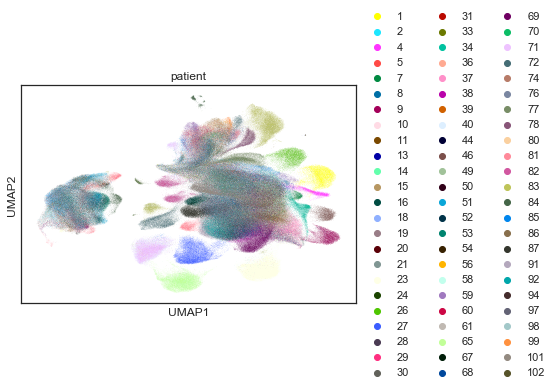

In [305]:
sc.pl.umap(adata,color='patient')

### Subset data

In [306]:
p1 = adata[adata.obs['DX_trim'].isin(['Control', 'Reative'])]

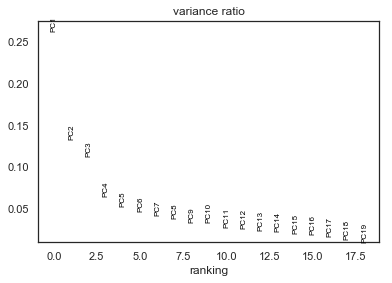

In [307]:
# Calculate PCA
sc.tl.pca(p1, svd_solver='arpack')
sc.pl.pca_variance_ratio(p1)

In [308]:
# UMAP
sc.pp.neighbors(p1, n_neighbors=30, n_pcs=7)
sc.tl.umap(p1)

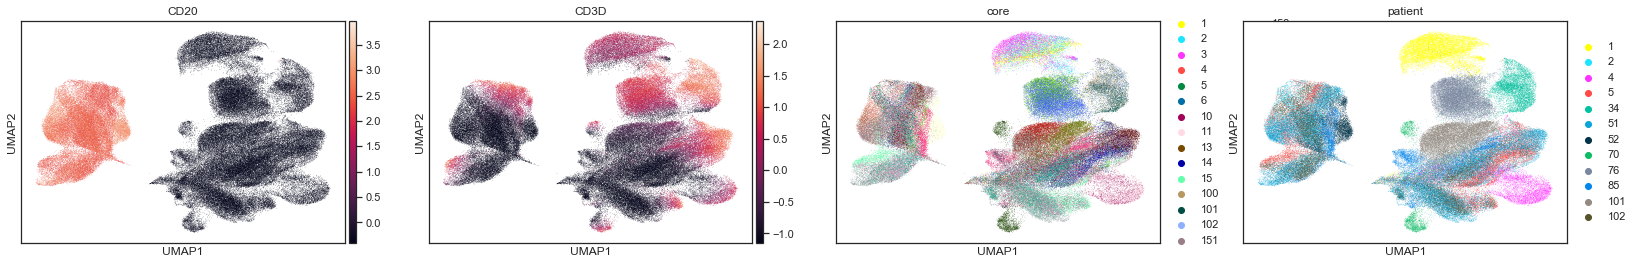

In [309]:
sc.pl.umap(p1, color=['CD20', 'CD3D', 'core', 'patient'])

### Batch correction

In [4]:
p1 = sc.read("p1.h5ad")
#p1.write("p1.h5ad")

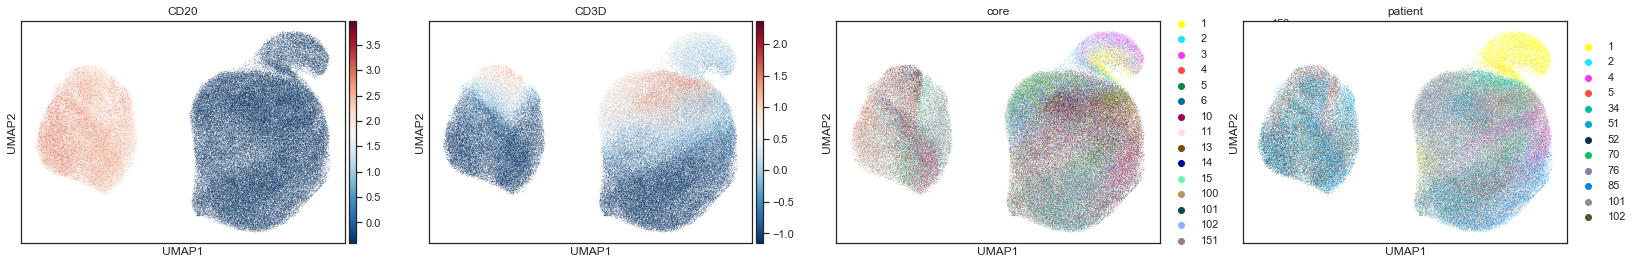

In [310]:
# bbknn method
adata_bbknn = bbknn.bbknn(p1, neighbors_within_batch=10, n_pcs=7, copy=True, batch_key='patient')
sc.tl.umap(adata_bbknn)
#sc.tl.louvain(adata_bbknn)

sc.pl.umap(adata_bbknn, color=['CD20', 'CD3D', 'core', 'patient'], color_map="RdBu_r")

Standardizing Data across genes.
found 12 batches
found 0 categorical variables:	
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


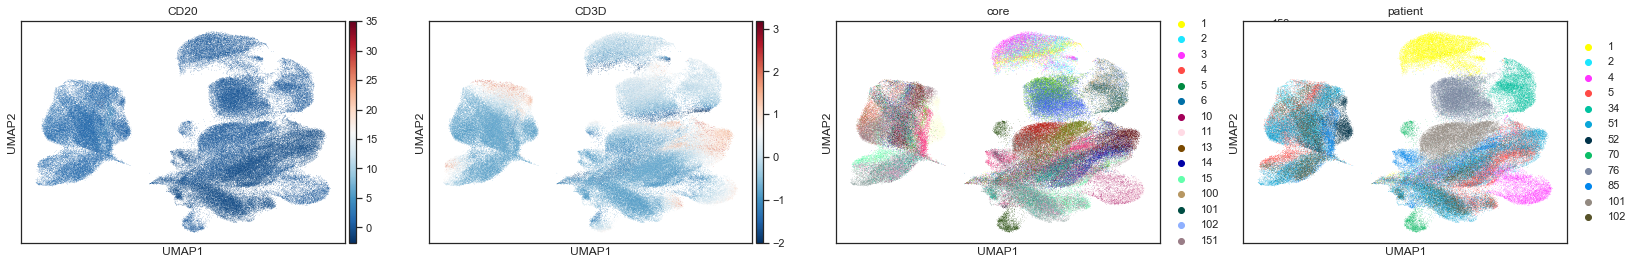

In [5]:
# Combat method
adata_combat = p1
sc.pp.combat(adata_combat, key='patient')
sc.tl.umap(adata_combat)
sc.pl.umap(adata_combat, color=['CD20', 'CD3D', 'core', 'patient'], color_map="RdBu_r")

Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 11: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 2 of 11: processing batch 2
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 3 of 11: processing batch 3
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 4 of 11: processing batch 4
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 5 of 11: processing batch 5
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 6 of 11: processing batch 6
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 7 of 11: processing batch 7
  Looking for MNNs...
  Computing correction vectors.

Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64'

Done.


... storing 'DX' as categorical
... storing 'DX_trim' as categorical
... storing 'StudyID' as categorical
... storing 'Tissue' as categorical
... storing 'core' as categorical


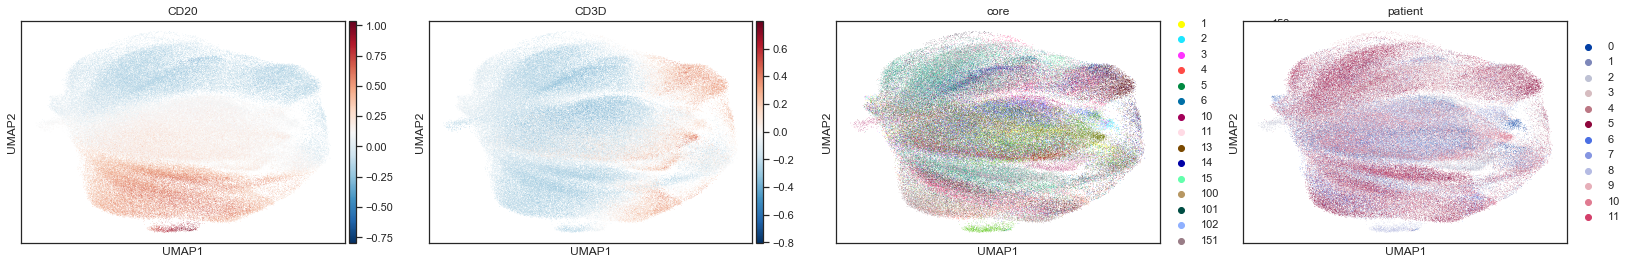

In [6]:
# MNN method
s1 = p1[p1.obs['patient'].isin(['1'])]
s2 = p1[p1.obs['patient'].isin(['2'])]
s3 = p1[p1.obs['patient'].isin(['4'])]
s4 = p1[p1.obs['patient'].isin(['5'])]
s5 = p1[p1.obs['patient'].isin(['34'])]
s6 = p1[p1.obs['patient'].isin(['51'])]
s7 = p1[p1.obs['patient'].isin(['52'])]
s8 = p1[p1.obs['patient'].isin(['70'])]
s9 = p1[p1.obs['patient'].isin(['76'])]
s10 = p1[p1.obs['patient'].isin(['85'])]
s11 = p1[p1.obs['patient'].isin(['101'])]
s12 = p1[p1.obs['patient'].isin(['102'])]
c = sce.pp.mnn_correct(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12, batch_key='patient')
p2 = c[0]
# UMAP
sc.pp.neighbors(p2, n_neighbors=30, n_pcs=7)
sc.tl.umap(p2)
sc.pl.umap(p2, color=['CD20', 'CD3D', 'core', 'patient'], color_map="RdBu_r")

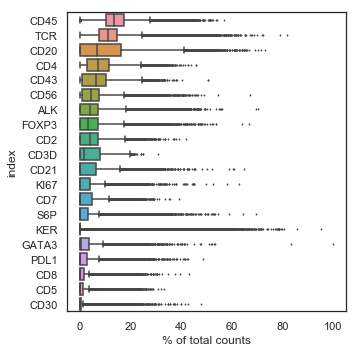

In [19]:
sc.pl.highest_expr_genes(adata_bbknn, n_top=20)

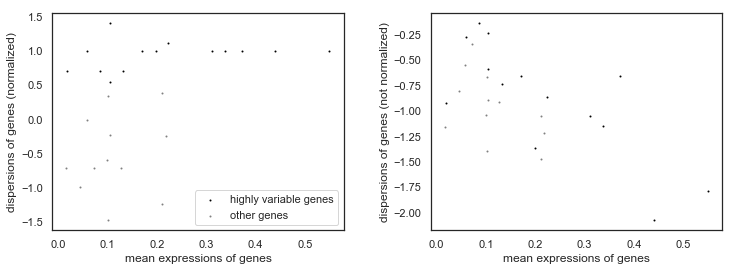

In [49]:
sc.pp.highly_variable_genes(adata_bbknn, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata_bbknn)

In [50]:
adata_bbknn

AnnData object with n_obs × n_vars = 151376 × 26 
    obs: 'core', 'patient', 'StudyID', 'Tissue', 'DX', 'DX_trim', 'code', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'neighbors', 'pca', 'core_colors', 'patient_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [57]:
p2 = adata_bbknn[:, adata_bbknn.var['highly_variable']]

In [58]:
p2.var.index

Index(['TCR', 'CD4', 'CD3D', 'CD43', 'ALK', 'CD45', 'KI67', 'CD8', 'CD20',
       'CD30', 'KER', 'PD1', 'CD21', 'TBET'],
      dtype='object', name='index')

In [59]:
# Remove other identified bad markers
c = ['CD45', 'ALK', 'KI67', 'KER', 'PD1', 'TBET']
r = np.in1d(p2.var_names, c)
p2 = p2[:, ~r]
p2.var.index

Index(['TCR', 'CD4', 'CD3D', 'CD43', 'CD8', 'CD20', 'CD30', 'CD21'], dtype='object', name='index')

In [60]:
p2

View of AnnData object with n_obs × n_vars = 151376 × 8 
    obs: 'core', 'patient', 'StudyID', 'Tissue', 'DX', 'DX_trim', 'code', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

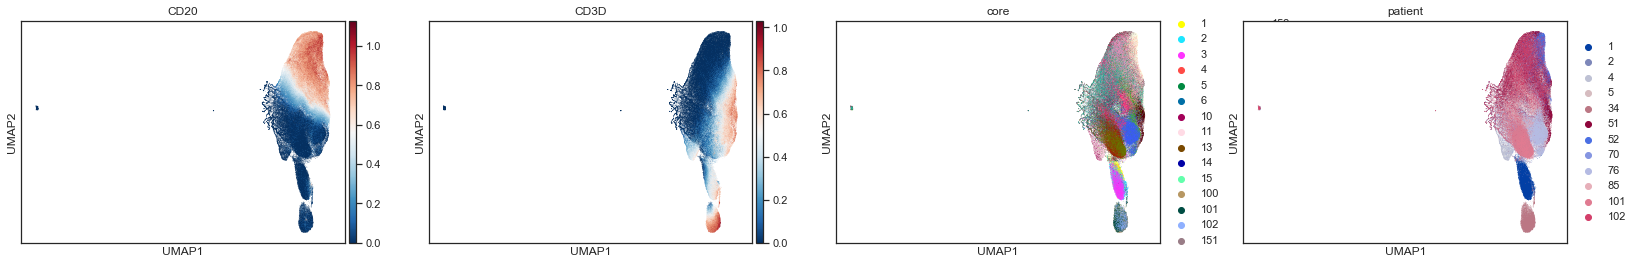

In [61]:
sc.pp.neighbors(p2, n_neighbors=30, n_pcs=8)
sc.tl.umap(p2)
sc.pl.umap(p2, color=['CD20', 'CD3D', 'core', 'patient'], color_map="RdBu_r")

In [28]:
import leidenalg
sc.tl.leiden(adata)

In [32]:
sc.tl.leiden(adata_bbknn)
adata_bbknn

AnnData object with n_obs × n_vars = 151376 × 26 
    obs: 'core', 'patient', 'StudyID', 'Tissue', 'DX', 'DX_trim', 'code', 'leiden'
    uns: 'neighbors', 'pca', 'core_colors', 'patient_colors', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

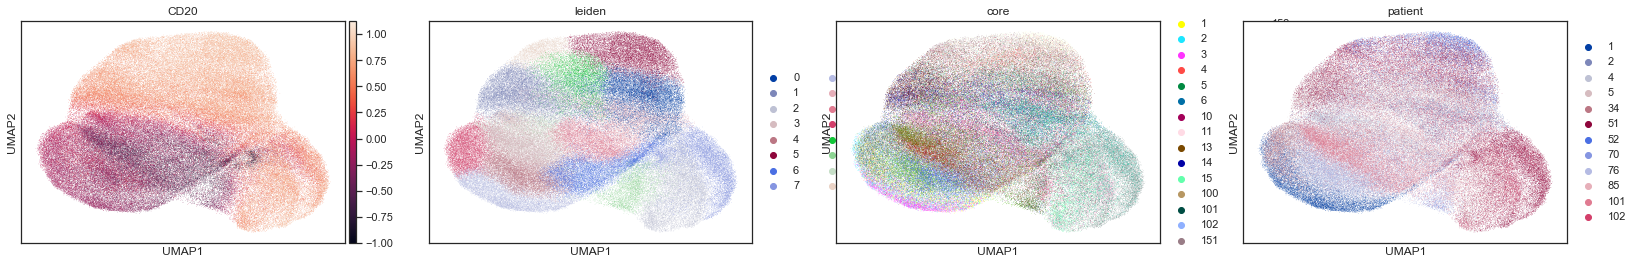

In [33]:
sc.pl.umap(adata_bbknn, color=['CD20', 'leiden', 'core', 'patient'])

In [92]:
s1 = adata[adata.obs['cores'].isin(['1'])]
s2 = adata[adata.obs['cores'].isin(['2'])]
s3 = adata[adata.obs['cores'].isin(['3'])]
s4 = adata[adata.obs['cores'].isin(['4'])]
s5 = adata[adata.obs['cores'].isin(['5'])]
s6 = adata[adata.obs['cores'].isin(['6'])]

In [93]:
c = sce.pp.mnn_correct(s1,s2,s3,s4,s5,s6, batch_key='cores')

Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 5: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 2 of 5: processing batch 2
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 3 of 5: processing batch 3
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 4 of 5: processing batch 4
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 5 of 5: processing batch 5
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
MNN correction complete. Gathering output...
Packing AnnData object...
Done.


In [94]:
p2 = c[0]

In [97]:
# UMAP
sc.pp.neighbors(p2, n_neighbors=30, n_pcs=5)
sc.tl.umap(p2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

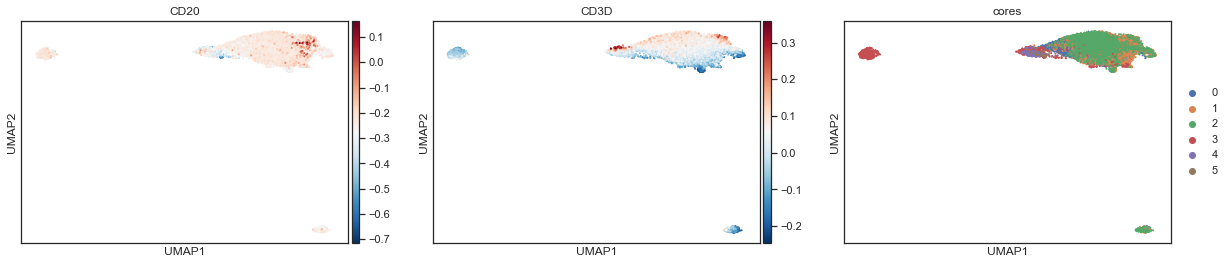

AttributeError: 'NoneType' object has no attribute 'ylim'

In [106]:
#ax.set(ylim=(-1, 1))
sc.pl.umap(p2, color=['CD20', 'CD3D', 'cores'], color_map="RdBu_r")

In [148]:
p = adata[adata.obs['cores'].isin(['1','2','3','4','5','6','7','8','9','10',
                                  '11','12','13','14','15','16','17','18','19','20',
                                  '21','22','23','24','25','26','27','28','29','30',
                                  '31','32','33','34','35','36','37','38','39','40'])]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

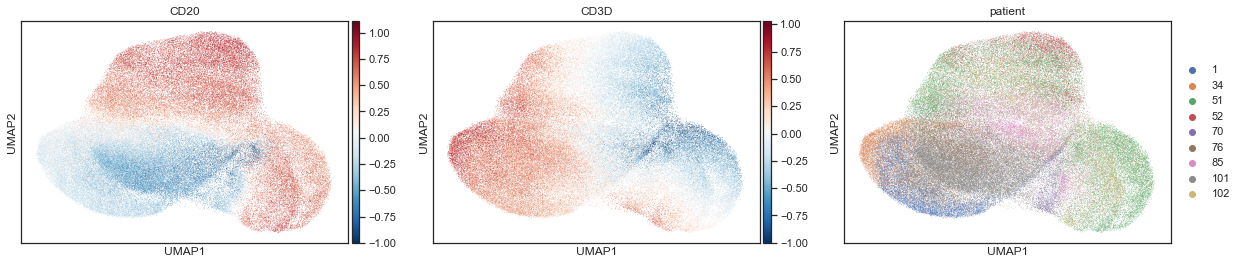

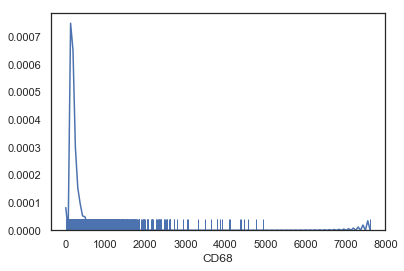

In [44]:
sns.distplot(data['CD68'], hist=False, rug=True)

#### Normalize based on custom methiod

In [45]:
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_normalize.py'
exec(open(wget.download(file_url)).read())
data_nn = mi_pp_normalize (data)

Applying log transformation and quantile normalization...


In [47]:
# Drop DAPI
data_nn = data_nn.drop(list(data_nn.filter(regex='DAPI|BACK', axis=1)), axis=1)

CD2       TCR      CD4      CD3D      CD7     CD43       ALK  \
ID                                                                       
1_1 -0.406640  0.231810 -0.61038 -0.245100 -0.39460 -0.35536 -0.410740   
1_2 -0.208120  0.353310 -0.40702 -0.143160 -0.32192 -0.40222 -0.457840   
1_3 -0.345370  0.028613 -0.46394 -0.186560 -0.37300 -0.20602 -0.524310   
1_4 -0.120140  0.219100 -0.35657 -0.072530 -0.30623  0.01909 -0.229020   
1_5 -0.031985 -0.049000 -0.19408 -0.050959 -0.28056 -0.22607  0.057713   

         CD45      CD10      KI67   ...        CD21      S6P      ERK  \
ID                                  ...                                 
1_1 -0.058780 -0.990550 -0.075095   ...    -0.39021 -0.54668 -0.54125   
1_2 -0.026391 -0.548220 -0.116100   ...    -0.34019 -0.43913 -0.62656   
1_3  0.073478 -0.816200  0.071263   ...    -0.38670 -0.50294 -0.68652   
1_4  0.155930 -0.260930 -0.051495   ...    -0.29164 -0.39117 -0.31303   
1_5  0.243970 -0.041982 -0.101010   ...    -0.32303 -0.37833  0.12395   

         TBET      TDT     BCL6    EBVLMP     CD31      CD16   PSTAT3  
ID                                                                     
1_1  0.068790 -0.94468 -0.88867 -0.365380 -0.37063 -0.517090 -0.27502  
1_2  0.351130 -0.41090 -0.69078 -0.158590 -0.36016 -0.296570 -0.23356  
1_3 -0.032020 -0.66349 -0.69435 -0.355140 -0.37063 -0.376790 -0.22695  
1_4  0.150620 -0.50284 -0.58655  0.217390 -0.34998 -0.121790 -0.17680  
1_5 -0.061973 -0.20285 -0.45637  0.064211 -0.34009  0.028438 -0.12005  

[5 rows x 35 columns]

In [49]:
# Convert to AnnData 
adata_n = sc.AnnData(data_nn)

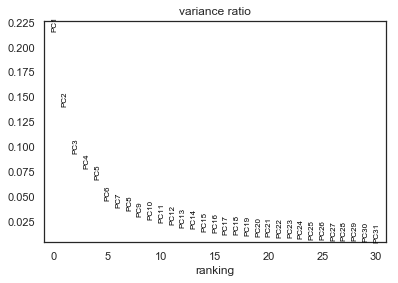

In [50]:
# Calculate PCA
sc.tl.pca(adata_n, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_n)

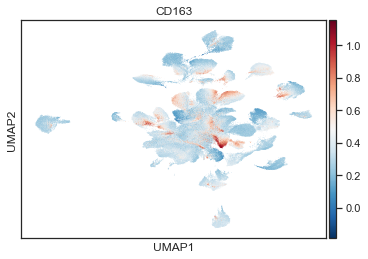

In [52]:
sc.pp.neighbors(adata_n, n_neighbors=30, n_pcs=5)
sc.tl.umap(adata_n)
sc.pl.umap(adata_n, color='CD163', color_map="RdBu_r")

In [ ]:
sc.tl.draw_graph(pdata)
sc.pl.draw_graph(pdata)

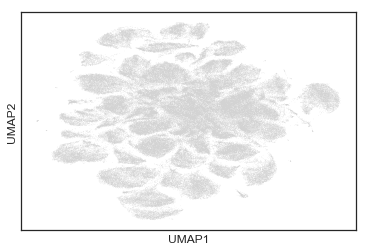

In [57]:
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=7)
sc.tl.umap(adata)
sc.pl.umap(adata)

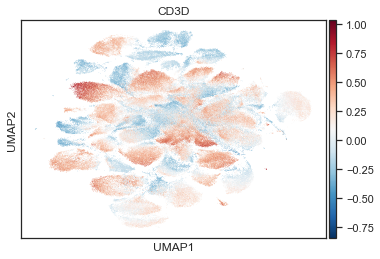

In [58]:
sc.pl.umap(adata,color='CD3D', color_map="RdBu_r")